# Project: Titanic Survival Prediction

Import Packages & read the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data from csv file to Pandas DataFrame
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# number of rows and Columns
df.shape

(891, 12)

In [5]:
# getting some informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Handaling

In [6]:
# check the number of missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the Missing values

In [7]:
# drop the "Cabin" column from the dataframe
df = df.drop(columns=['Cabin','Name','PassengerId','Ticket','Fare'], axis=1)

In [8]:
# replacing the missing values in "Age" column with mean value
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [9]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C


In [10]:
# finding the mode value of "Embarked" column
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [11]:
print(df['Embarked'].mode()[0])

S


In [12]:
# replacing the missing values in "Embarked" column with mode value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [13]:
# check the number of missing values in each column
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [14]:
# getting some statistical measures about the data
df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,13.002015,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


# EDA

In [15]:
# finding the number of people survived and not survived
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [16]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

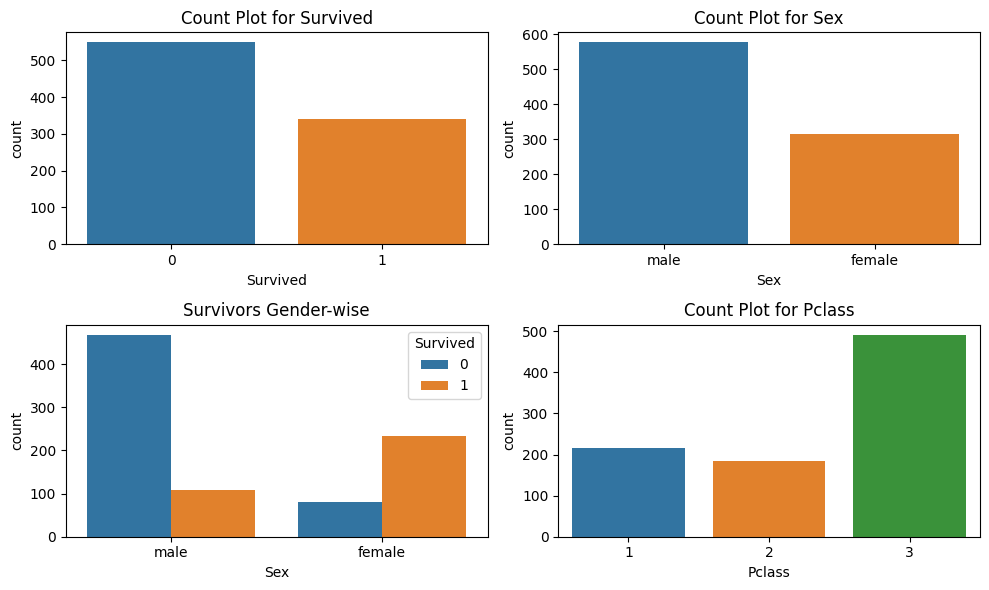

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 rows and 2 columns of subplots
plt.figure(figsize=(10, 6))

# First subplot (top-left)
plt.subplot(2, 2, 1)
sns.countplot(x='Survived', data=df)
plt.title('Count Plot for Survived')

# Second subplot (top-right)
plt.subplot(2, 2, 2)
sns.countplot(x='Sex', data=df)
plt.title('Count Plot for Sex')

# Third subplot (bottom-left)
plt.subplot(2, 2, 3)
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survivors Gender-wise')

# Fourth subplot (bottom-right)
plt.subplot(2, 2, 4)
sns.countplot(x='Pclass', data=df)
plt.title('Count Plot for Pclass')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

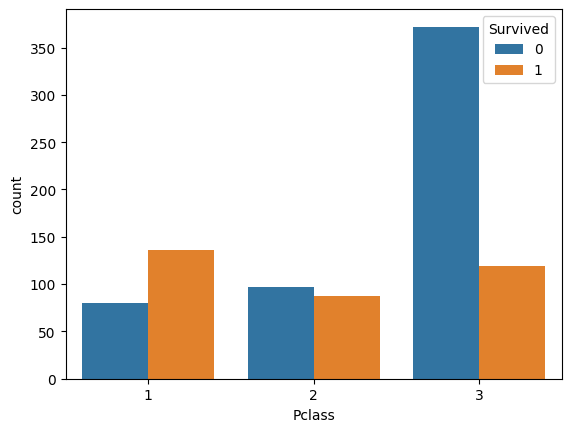

In [18]:
sns.countplot(x='Pclass', hue='Survived', data=df);

Encoding the Categorical Columns

In [19]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [20]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [21]:
# converting categorical Columns

df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [23]:
correlation = df.corr()
print(correlation)

          Survived    Pclass       Sex       Age     SibSp     Parch  Embarked
Survived  1.000000 -0.338481  0.543351 -0.069809 -0.035322  0.081629  0.106811
Pclass   -0.338481  1.000000 -0.131900 -0.331339  0.083081  0.018443  0.045702
Sex       0.543351 -0.131900  1.000000 -0.084153  0.114631  0.245489  0.116569
Age      -0.069809 -0.331339 -0.084153  1.000000 -0.232625 -0.179191  0.007461
SibSp    -0.035322  0.083081  0.114631 -0.232625  1.000000  0.414838 -0.059961
Parch     0.081629  0.018443  0.245489 -0.179191  0.414838  1.000000 -0.078665
Embarked  0.106811  0.045702  0.116569  0.007461 -0.059961 -0.078665  1.000000


<Axes: >

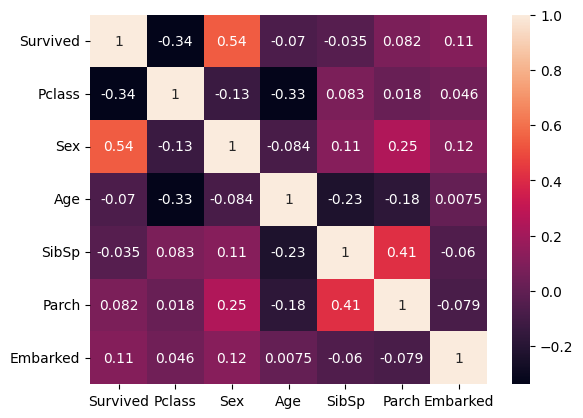

In [24]:
correlation = df.corr()
sns.heatmap(correlation, annot=True)

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [26]:
df.to_csv("ready_Titanic.csv")

# Separating features & Target

In [27]:
X = df.drop(columns = ['Survived'],axis=1)
y = df['Survived']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Model Build with
 Logistic Regression

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

X = df.drop(columns = ['Survived'],axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Define transformers for numeric and categorical columns
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch']
categorical_features = ['Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Note: You can add a categorical transformer if needed

# Combine transformers for numeric and categorical features using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        # Add ('cat', categorical_transformer, categorical_features) for categorical features
    ])

# Create a Logistic Regression model with the preprocessing step
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the Logistic Regression model on the training data (including preprocessing)
model.fit(X_train, y_train)

# Make predictions on the training data
X_train_prediction = model.predict(X_train)

# Calculate accuracy on the training data
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data:', training_data_accuracy)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy on the test data
test_data_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score of test data:', test_data_accuracy)

# Calculate cross-validation mean squared error
mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # Convert negative MSE scores to positive

# Calculate the mean MSE score
mean_mse = mse_scores.mean()
print('Mean Squared Error (MSE) from Cross-Validation:', mean_mse)

# Calculate precision score
prec_score = precision_score(y_test, y_pred)
print('Precision Score:', prec_score)

# Generate a confusion matrix on the test data
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix on the test data:\n', conf_matrix)

# Generate a classification report on the test data
class_report = classification_report(y_test, y_pred)
print('Classification Report on the test data:\n', class_report)

Accuracy score of training data: 0.6952247191011236
Accuracy score of test data: 0.7430167597765364
Mean Squared Error (MSE) from Cross-Validation: 0.30969179586968804
Precision Score: 0.78
Confusion Matrix on the test data:
 [[94 11]
 [35 39]]
Classification Report on the test data:
               precision    recall  f1-score   support

           0       0.73      0.90      0.80       105
           1       0.78      0.53      0.63        74

    accuracy                           0.74       179
   macro avg       0.75      0.71      0.72       179
weighted avg       0.75      0.74      0.73       179



# Improve Model with
 Logistic Regression, RandomForestClassifier, GradientBostingClassifier

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop(columns = ['Survived'],axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Define transformers for numeric and categorical columns
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch']
categorical_features = ['Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine transformers for numeric and categorical features using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Initialize models with preprocessing step
models = [
    ('Logistic Regression', Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(max_iter=1000))])),
    ('Random Forest', Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])),
    ('Gradient Boosting', Pipeline(steps=[('preprocessor', preprocessor), ('classifier', GradientBoostingClassifier(random_state=42))]))
]

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate and compare models using cross-validation
for name, model in models:
    scores_accuracy = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    mean_accuracy = np.mean(scores_accuracy)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    test_accuracy = accuracy_score(y_test, y_pred)

    prec_score = precision_score(y_test, y_pred)

    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f'Model: {name}')
    print(f'Cross-Validation Mean Accuracy: {mean_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Precision Score: {prec_score:4f}')
    print(f'Classification Report:\n{classification_rep}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print('\n')

# Select and evaluate the best model on the test set based on accuracy
best_model = max(models, key=lambda x: np.mean(cross_val_score(x[1], X_train, y_train, cv=cv, scoring='accuracy')))[1]

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Best Model Test Accuracy: {test_accuracy:.4f}')
print(f'Best Model Classification Report:\n{classification_rep}')
print(f'Best Model Confusion Matrix:\n{conf_matrix}')


Model: Logistic Regression
Cross-Validation Mean Accuracy: 0.7991
Test Accuracy: 0.8101
Precision Score: 0.785714
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
[[90 15]
 [19 55]]


Model: Random Forest
Cross-Validation Mean Accuracy: 0.7837
Test Accuracy: 0.8212
Precision Score: 0.818182
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
[[93 12]
 [20 54]]




# GaussianNB, MultinomialNB, BernoulliNB

In [31]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

X = df.drop(columns = ['Survived'],axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [32]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print(f'Test Accuracy of gnb: {accuracy_score(y_test, y_pred1)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred1)}')
print(f'Precision Score: {precision_score(y_test, y_pred1)}')

Test Accuracy of gnb: 0.7653631284916201
Confusion Matrix:
 [[80 25]
 [17 57]]
Precision Score: 0.6951219512195121


In [33]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print(f'Test Accuracy of mnb: {accuracy_score(y_test, y_pred2)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred2)}')
print(f'Precision Score: {precision_score(y_test, y_pred2)}')

Test Accuracy of mnb: 0.7821229050279329
Confusion Matrix:
 [[88 17]
 [22 52]]
Precision Score: 0.7536231884057971


In [34]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print(f'Test Accuracy of bnb: {accuracy_score(y_test, y_pred3)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred3)}')
print(f'Precision Score: {precision_score(y_test, y_pred3)}')

Test Accuracy of bnb: 0.7821229050279329
Confusion Matrix:
 [[88 17]
 [22 52]]
Precision Score: 0.7536231884057971


# RandomForest Classifier

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, mean_squared_error

X = df.drop(columns = ['Survived'],axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best Random Forest model with the optimal hyperparameters
best_rf_model = grid_search.best_estimator_

# Fit the best model to the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on test data:', test_accuracy)

# Calculate and display the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Generate a classification report with precision, recall, F1-score, and support
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

precision = precision_score(y_test,y_pred)
print('Precision Score:', precision)

Accuracy on test data: 0.8156424581005587
Confusion Matrix:
[[95 10]
 [23 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

Precision Score: 0.8360655737704918


# Improve Model

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop(columns = ['Survived'],axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Create transformers for numeric and categorical columns
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch']
categorical_features = ['Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine transformers for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# Create a pipeline combining preprocessing and modeling
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', gbc)
])

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calculate cross-validation scores for accuracy
scores_accuracy = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
mean_accuracy = np.mean(scores_accuracy)

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Calculate precision score
prec_score = precision_score(y_test, y_pred)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f'Cross-Validation Mean Accuracy: {mean_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Precision Score: {prec_score:.4f}')
print(f'Classification Report:\n{classification_rep}')
print(f'Confusion Matrix:\n{conf_matrix}')

Cross-Validation Mean Accuracy: 0.8048
Test Accuracy: 0.8156
Precision Score: 0.8475
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       105
           1       0.85      0.68      0.75        74

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179

Confusion Matrix:
[[96  9]
 [24 50]]


In [37]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [38]:
import pickle  # Import the pickle module

model_filename = 'gradient_boosting_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(pipeline, model_file)

In [39]:
import pandas as pd
import numpy as np


# Create a DataFrame to hold the input data
input_data = pd.DataFrame(columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'])

# Prompt the user to input data
for feature in input_data.columns:
    value = input(f"Enter the value for {feature}: ")
    input_data.at[0, feature] = float(value)  # Assuming the input is numeric

# Make predictions on the input data using the trained model (best_rf_model)
y_input_pred = best_rf_model.predict(input_data)

# Print the predicted class (0 or 1)
print('Predicted Survived:', y_input_pred[0])


Enter the value for Pclass:  1
Enter the value for Sex:  0
Enter the value for Age:  2
Enter the value for SibSp:  3
Enter the value for Parch:  4
Enter the value for Embarked:  1


Predicted Survived: 1
